In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

load = pd.read_csv(r"C:\Users\Gabriela Navas\Documents\Python\pythonwithgabs\data.csv")
load.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We can create and build models to classify the type of cancer, so it will be easy for doctors to provide treatment on the right time.

#classification problem 

The problem is to build a model which will classify between malignant and beningn types od cancer.

In [20]:

load.shape  #to see dimension of the dataset

(569, 33)

In [21]:

load.columns #to display the column names in the dataset

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [22]:

load.info()  #display information about the column attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:

load.isna().sum()  #counting the empty values in each column

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [37]:

load= load.drop('Unnamed: 32', axis=1) #since we have no values on the unnamed column, we must drop it off


AttributeError: 'LogisticRegression' object has no attribute 'drop'

In [25]:
load["diagnosis"].unique()
load["diagnosis"].value_counts()# To count the values on the diagnosis column

B    357
M    212
Name: diagnosis, dtype: int64

In [26]:


x=list(load.columns) #Converting the column names to a list
print(x)


['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [27]:
load.describe() #a summary of all numeric columns

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


C:\Users\Gabriela Navas\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


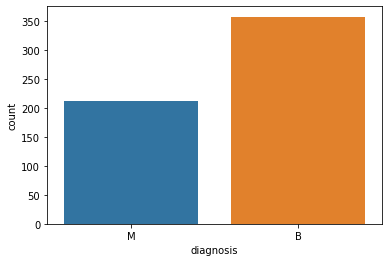

In [28]:
#A visualization that will show the total count of malignant and benign patients in a counterplot
sns.countplot(load["diagnosis"]);

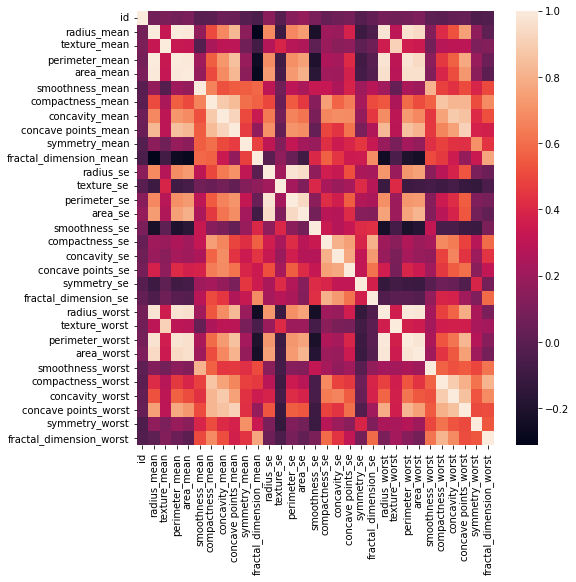

In [29]:
#heatmap of Correlation 
corr=load.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr);

The heatmaps visualize data through a variations in coloring. This will be useful for cross-examining muticariate dta, through placing variables in the rows and columns and coloring the cells withint the table.                                          
First dimension appears as rows
Second dimension column

Since some data contain label values instead of numerica values. We will convert them into a numeric data for a predictive model

In [30]:
load['diagnosis']= load['diagnosis'].map({"M":1,"B":0})
load["diagnosis"].unique()

#Malignant type (1)
#Benign type(0)

array([1, 0], dtype=int64)

In [39]:
#Splitting the data into the Training and Testing set
x = load.drop ("diagnosis",axis=1)
y = load ["diagnosis"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.3)

#check the shape of the training data
x_train.shape 


AttributeError: 'LogisticRegression' object has no attribute 'drop'

In [32]:
#chech the shape of the test data
x_test.shape 

(171, 31)

The data has been split correctly as it has been splitted in 70% and 30% ratio

Since the data contain highly varying features. Therefore features need to be brought down to the same level of magnitudes. This can be done by Scaling the data (0-1)

Use StandardScaler method in Scikit-learn Library

In [35]:
#Scaling of data
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform (x_test)

The Model Selection
Using Supervised Classification Machine Learning Algorithms. 
We are goung to fit the model on 4 different classification algorithms.
-Logistic Regression
-Decision Tree Classifier
-Random Forest Classifier
-Support Vector Machine

The algorithm with the highest accuracy will be used


In [38]:
#Importing  Logistic Regressin from Scikit learn Library

from sklearn.linear_model import LogisticRegression
load = LogisticRegression()
#Load the training data to the model
load.fit(x_train, y_train)

LogisticRegression()

In [40]:
# prediction of the putput with the test data

y_pred =load.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [41]:
y_test

543    0
500    0
60     0
171    1
192    0
      ..
257    1
380    0
520    0
438    0
495    0
Name: diagnosis, Length: 171, dtype: int64

In [42]:
#Accuracy Score of Logistic Regression
from sklearn.metrics import accuracy_score
print("Accuracy Score of Logistic Regression:")
print(accuracy_score(y_test, y_pred))

Accuracy Score of Logistic Regression:
0.9590643274853801


Decision Tree Classifier
takes input as two arrays: an array X (n_samples, n_features)
An array Y of intger values (n_samples)

In [43]:
#Importing Decision Tree Classifier using Scikigt Learn Library
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()

#Loading the training data
dtc.fit(x_train,y_train)



DecisionTreeClassifier()

In [44]:
#Predicting output with the test data
y_pred =dtc.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [45]:
#Accuracy Score of Decision Tree Classifier
from sklearn.metrics import accuracy_score
print("Accuracy Score of Decision Tree Classifier:")
print(accuracy_score(y_test, y_pred))


Accuracy Score of Decision Tree Classifier:
0.9239766081871345


A Random is a classifier contianing a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy 

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

#Load the training data
rf.fit(x_train, y_train) 


RandomForestClassifier()

In [47]:
#predicting output test data
y_pred =rf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [48]:
#Acurracy Score on th Random Forest
from sklearn.metrics import accuracy_score
print("Accuracy Score of Random Forest Classifier:")
print(accuracy_score(y_test,y_pred))

Accuracy Score of Random Forest Classifier:
0.9298245614035088


Support Vector Classifier
It takes input as two arrays 
an array x of shape 
an array Y of class label 

In [49]:
from sklearn import svm
svc = svm.SVC()
#Load the data
svc.fit(x_train, y_train)


SVC()

In [51]:
y_pred =svc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [1]:
#Accuracy Score of Support Vector classifier
from sklearn.metrics import accuracy_score
print("Accuracy Score of Suppor Vector Classifier:")
print(accuracy_score(y_test,y_pred))


Accuracy Score of Suppor Vector Classifier:


NameError: name 'y_test' is not defined